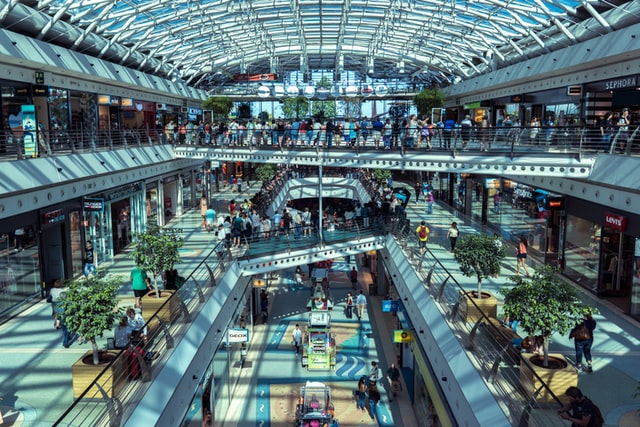

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the data

In [ ]:
mallCustomers_filepath = "../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"
mallCustomers_data = pd.read_csv(mallCustomers_filepath, index_col="CustomerID")

## Getting sense of the data

In [ ]:
mallCustomers_data.columns

In [ ]:
mallCustomers_data.dtypes

In [ ]:
type(mallCustomers_data)

In [ ]:
mallCustomers_data.describe()

In [ ]:
mallCustomers_data.head(10)

#### Visualization

Age distribution

In [ ]:
sns.distplot(a=mallCustomers_data['Age'], kde=False)

Age and income

In [ ]:
plt.figure(figsize=(19,8))
sns.lineplot(x=mallCustomers_data['Annual Income (k$)'], y=mallCustomers_data['Age'])

In [ ]:
sns.jointplot(x=mallCustomers_data['Annual Income (k$)'], y=mallCustomers_data['Age'], kind="kde")

Spending Score and Age

In [ ]:
sns.jointplot(x=mallCustomers_data['Spending Score (1-100)'], y=mallCustomers_data['Age'], kind="kde")

Gender

In [ ]:
labels = mallCustomers_data['Gender'].astype('category').cat.categories.tolist()
counts = mallCustomers_data['Gender'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Age, income and Score

In [ ]:
plt.figure(figsize=(19,8))

# Histograms for each species
sns.distplot(a=mallCustomers_data['Annual Income (k$)'], label="Annual Income", kde=False)
sns.distplot(a=mallCustomers_data['Age'], label="Age", kde=False)
sns.distplot(a=mallCustomers_data['Spending Score (1-100)'], label="Spending Score", kde=False)

# Add title
plt.title("Histogram of , by Species")
plt.xlabel("Values")
plt.ylabel("Count")

# Force legend to appear
plt.legend()

In [ ]:
plt.figure(figsize=(19,8))

sns.lineplot(x=mallCustomers_data['Annual Income (k$)'], y=mallCustomers_data['Age'], color = 'blue')
sns.lineplot(x=mallCustomers_data['Annual Income (k$)'], y=mallCustomers_data['Spending Score (1-100)'], color = 'yellow')
plt.title('Annual Income - Age and Spending Score', fontsize = 20)
plt.ylabel('Spending Score and Age')
plt.show()

## K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Income and Spending Score
incomeAndScoreData = mallCustomers_data.iloc[:, [2, 3]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(incomeAndScoreData)
    wcss.append(kmeans.inertia_)
    

sns.set_style("whitegrid")
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS [within inertia]')
plt.show()


### Dendograms

In [ ]:
X = incomeAndScoreData

In [ ]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(20,6))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), no_labels=True, leaf_font_size=30) # linkage is the HC algorithm
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian distances')

plt.show()

Five seems a good number of clusters.

### Applying kmeans to the mall dataset

In [ ]:

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


### Visualizing the clusters

We are going to start by visualizing the obtained clusters and then we are going to describe them.

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

By looking at the positioning of the different clusters in relation to spending score and annual income, we can therefore describe each customer group.

Some earn a lot and spend little, others earn little and spend a lot, etc.

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()